 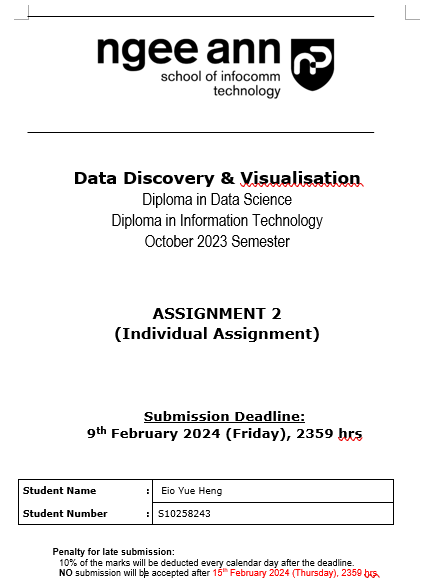

# Table of Contents
[Introduction](#introduction)  
[Data Preparation](#data-preparation)  
[Visualisations](#visualisations)  
[Dashboards](#dashboards)  
[Recommendations and Conclusion](#recommendations-conclusion)  
[Reflection](#reflection)  
[References](#references)

# Introduction <a id = "introduction"></a>

One of the biggest names in the bike-sharing market, Leo Bike Share Co., has been using data to enhance its offerings and adjust to the changing needs of its clientele. The company's market research team has been gathering and analyzing data from bike-sharing rentals over the last two years in order to capture the complex patterns and trends that characterize its operations. The vast dataset, contained in the BikeSharing Dataset.csv file, is a valuable source of data that sheds light on the variables affecting bike rentals.

The goal of the study is to comprehend how weather, especially weather-related factors, affects bike rentals. The team wants to understand the complex interaction between weather patterns and bike-sharing dynamics through careful data preparation, in-depth study, and perceptive visualization tools. This investigation serves as the basis for strategic decision-making and the development of practical suggestions meant to drive Leo Bike Share Co. toward continued expansion and improved client contentment.

Understanding the dynamics of the present is important, but so is providing management with knowledge that will enable it to lead the organization into a more flexible and resilient future. Leo Bike Share Co wants to meet and surpass ridership objectives by utilizing data, which will help create a more sustainable and user-focused urban transportation experience.


# Data Preparation <a id = "data-preparation"></a>

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.patches as mpatches
from pandas.api.types import CategoricalDtype

import numpy as np
import pandas as pd

In [2]:
filename = "BikeSharing Dataset.csv"
df = pd.read_csv(filename)
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,27/12/2012,1,1,12,0,4,1,2,10.42,11.33,65.29,23.46,247,1867,2114
727,728,28/12/2012,1,1,12,0,5,1,2,10.39,12.75,59.00,10.42,644,2451,3095
728,729,29/12/2012,1,1,12,0,6,0,2,10.39,12.12,75.29,8.33,159,1182,1341
729,730,30/12/2012,1,1,12,0,0,0,1,10.49,11.59,48.33,23.50,364,1432,1796
730,731,31/12/2012,1,1,12,0,1,1,2,8.85,11.17,57.75,10.37,439,2290,2729


For data preparation done for this report, the year was modified to show the actual year figure to accurately display in the visual when this was happening. The seasons were also replaced by their actual names so as to facilitate understanding across the board and not allow for miscommunication. The days of the week were also replaced with their actual names so as to allow for no possible confusion where people might have different interpretation of the data. The weather was categorised for easier understanding and not overcomplicate the data with the different variations of weather conditions. I also made dteday the index and removed instant for I found it redundant. The below is how I did it.

In [3]:
df['yr'] = df['yr'].replace({0: 2011, 1: 2012})

season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
df['season'] = df['season'].replace(season_mapping)

weekday_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 0: 'Sunday'}
df['weekday'] = df['weekday'].replace(weekday_mapping)

months = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df['mnth'] = df['mnth'].replace(months)

weather_dict = {
    1: 'Fair Weather',
    2: 'Misty Weather',
    3: 'Light Precipitation',
    4: 'Severe Weather'
}

df['weathersit'] = df['weathersit'].replace(weather_dict)

df['dteday'] = pd.to_datetime(df['dteday'], format='%d/%m/%Y')
df.set_index('dteday', inplace=True)
df.drop('instant', axis=1, inplace=True)

print(df)

            season    yr mnth  holiday    weekday  workingday     weathersit  \
dteday                                                                         
2011-01-01  spring  2011  Jan        0   Saturday           0  Misty Weather   
2011-01-02  spring  2011  Jan        0     Sunday           0  Misty Weather   
2011-01-03  spring  2011  Jan        0     Monday           1   Fair Weather   
2011-01-04  spring  2011  Jan        0    Tuesday           1   Fair Weather   
2011-01-05  spring  2011  Jan        0  Wednesday           1   Fair Weather   
...            ...   ...  ...      ...        ...         ...            ...   
2012-12-27  spring  2012  Dec        0   Thursday           1  Misty Weather   
2012-12-28  spring  2012  Dec        0     Friday           1  Misty Weather   
2012-12-29  spring  2012  Dec        0   Saturday           0  Misty Weather   
2012-12-30  spring  2012  Dec        0     Sunday           0   Fair Weather   
2012-12-31  spring  2012  Dec        0  

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    object 
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    object 
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    object 
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    object 
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  cnt         731 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 85.7+ KB
None


# Visualisations <a id = "visualisations"></a>

Visual 1 - how the weather affects the number of users

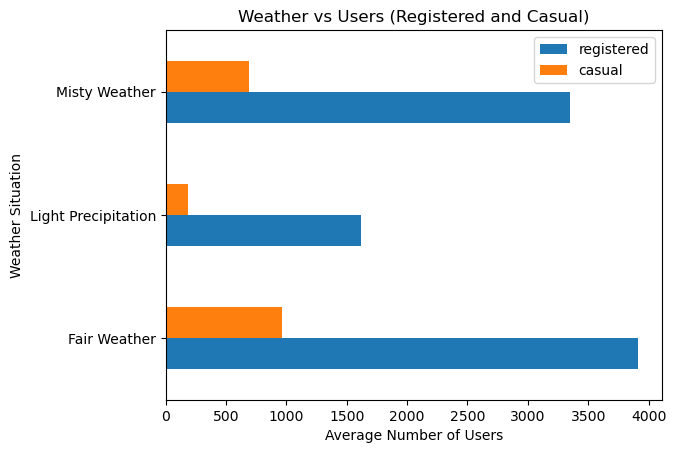

In [5]:
grouped = df.groupby('weathersit')[['registered', 'casual']].mean()
fig, ax = plt.subplots()
grouped.plot(kind='barh', stacked=False, ax=ax)
ax.set_title('Weather vs Users (Registered and Casual)')
ax.set_xlabel('Average Number of Users')
ax.set_ylabel('Weather Situation')
plt.show()

The tallest bar represents “Fair Weather” (Clear, Few clouds, Partly cloudy), reaching close to total 5000 users. This suggests that more users prefer to rent bikes when the weather is clear or has few clouds. This could be because such weather conditions are ideal for outdoor activities like biking. The second tallest bar represents “Misty Weather” (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist), with over 4000 users. This indicates that a significant number of users are still willing to rent bikes even in misty conditions. The shortest bar represents “Light Precipitation” (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) with less than 2000 users. This suggests that fewer users rent bikes when there’s light snow or rain, possibly due to safety concerns or discomfort. From these insights, one could recommend that Leo Bike Share Co might focus on promoting bike rentals on clear or misty days to maximize usage. On days with light precipitation, they could offer incentives, promotions or even invest resources to manufacture weather-protected bikes to encourage more users to rent bikes.

Visual 2 - how the season influences the number of users

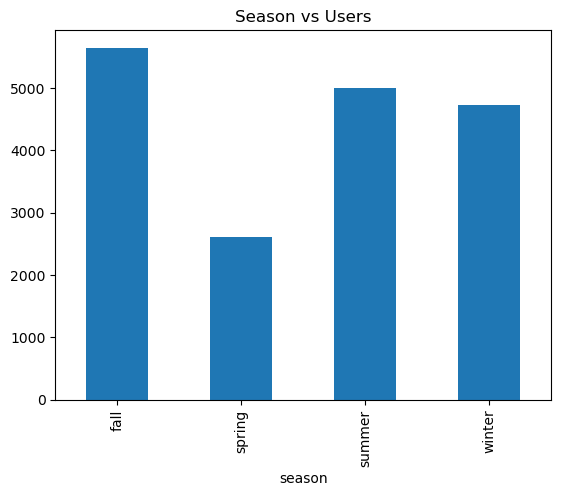

In [6]:
fig = df.groupby('season')['cnt'].mean().plot(kind='bar', title='Season vs Users').get_figure()
plt.show()

The bars representing Fall is over 5000 and for Summer it is close to 5000 users, suggesting that these seasons have the highest bike rentals. This could be due to favorable weather conditions during these seasons, making outdoor activities like biking more enjoyable. The Spring bar is significantly lower, with around 2000 users. This could indicate that fewer people rent bikes during Spring. The reasons could be varied - perhaps the weather is more unpredictable, or there are fewer tourists around this time. Despite the cold weather, Winter sees a substantial number of bike rentals, though not as high as Fall and Summer. This could be due to the holiday season or people using bikes for commuting. From these insights, one could recommend that Leo Bike Share Co. might focus on promoting bike rentals during Fall and Summer when demand is high. For Spring, they could investigate why rentals are low and take appropriate measures to boost them. Despite the cold in Winter, they could explore opportunities around the holiday season or commuting needs.

Visual 3 - Scatter plot on how apparent temp affect the number of users

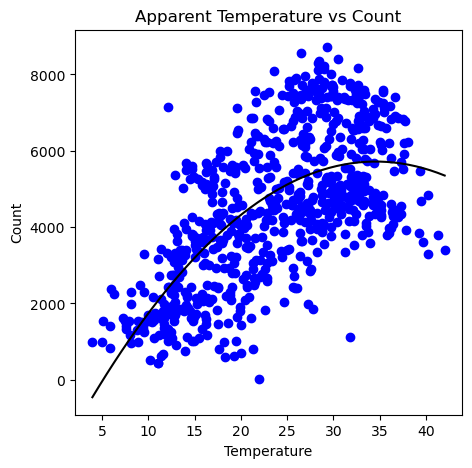

In [7]:
plt.figure(figsize=(5,5))
plt.scatter(df['atemp'], df['cnt'], color='b')
coefficients = np.polyfit(df['atemp'], df['cnt'], 2)
polynomial = np.poly1d(coefficients)
x_values = np.linspace(df['atemp'].min(), df['atemp'].max())
y_values = polynomial(x_values)
plt.plot(x_values, y_values, color='black')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Apparent Temperature vs Count')
plt.show()

The scatter plot shows a positive correlation between the apparent temperature and the count. This means that as the temperature increases, so does the count. This could indicate that the number of users increases with the increase in temperature. There’s a noticeable concentration of data points around the 25 to 35 range on the x-axis and 3000 to over 8000 on the y-axis. This could suggest that the majority of counts occur when the temperature difference is within this range. The positive correlation between apparent temperature and count suggests that apparent temperature could be a significant factor influencing the count making it relevant for Leo Bike Share Co. The concentration of data points in the 25 to 35 apparent temperature range suggests that this is the optimal range for maximizing the number of bike rentals. Strategies could be developed to leverage this insight, such as marketing promotions during periods when the apparent temperature is expected to be within this range. Other possible strategies could include optimizing service delivery, and improving user engagement.

Visual 4 - Scatter plot on how windspeed affect the number of users

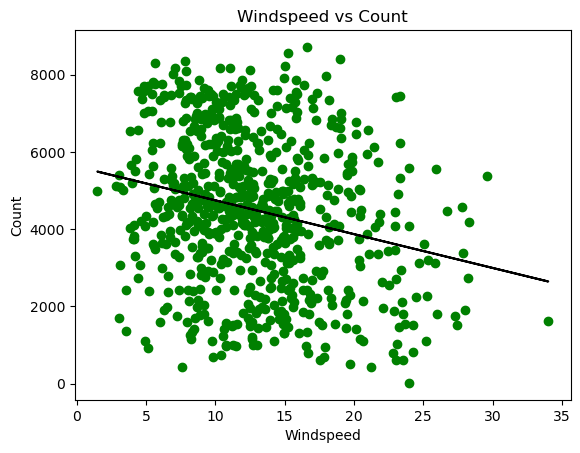

In [8]:
plt.scatter(df['windspeed'], df['cnt'], color='g')
m, b = np.polyfit(df['windspeed'], df['cnt'], 1)
plt.plot(df['windspeed'], m*df['windspeed'] + b, color='black')
plt.xlabel('Windspeed')
plt.ylabel('Count')
plt.title('Windspeed vs Count')
plt.show()

The green dots are more concentrated towards the lower end of windspeed. This could suggest that lower windspeeds are more conducive for bike rentals. High windspeeds, which could make biking more difficult, seem to correspond to lower counts suggesting a negative correlation between windspeed and count, indicating that as windspeed increases, the count of bike rentals tends to decrease. Leo Bike Share Co can consider integrating weather forecasts into the bike-sharing service. This could help users plan their bike rentals in advance based on expected windspeeds and since most bike rentals occur at lower windspeeds, consider offering promotions or discounts during times when the windspeed is expected to be low to encourage more rentals. Implementing safety measures for high windspeed conditions, such as limiting rentals or additional safety features on the bikes could help ensure user safety and maintain a positive brand image.

Visual 5 - Scatter plot on how humidity affects the number of users

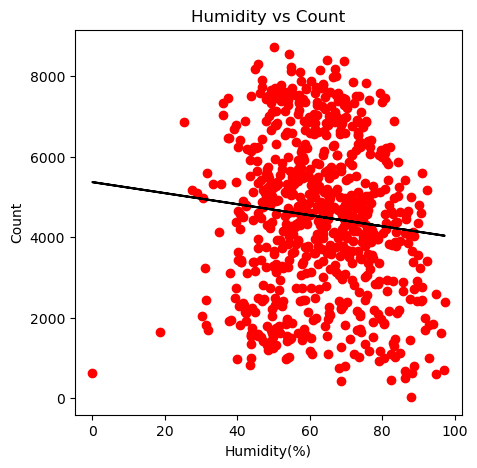

In [9]:
plt.figure(figsize=(5,5))
plt.scatter(df['hum'], df['cnt'], color='r')
m, b = np.polyfit(df['hum'], df['cnt'], 1)
plt.plot(df['hum'], m*df['hum'] + b, color='black')
plt.xlabel('Humidity(%)')
plt.ylabel('Count')
plt.title('Humidity vs Count')
plt.show()

The scatter plot shows a collection of points that represent the count of bike rentals at different humidity levels. The trendline suggests a negative correlation between humidity and count, indicating that as humidity increases, the count of bike rentals tends to decrease. Leo Bike Share Co can consider integrating weather forecasts into the bike-sharing service. This could help users plan their bike rentals in advance based on expected humidity levels. Since most bike rentals occur around 40% to 80% humidity levels, consider offering promotions or discounts during times when the humidity is expected to be comfortable to encourage more rentals. Implementing safety measures for high humidity conditions, such as limiting rentals or providing fluids to the rider through redeeming rewards like disposable water bottles at local gas stations. This could help ensure user safety and maintain a positive brand image.

Visual 6 - the increase of users over the years

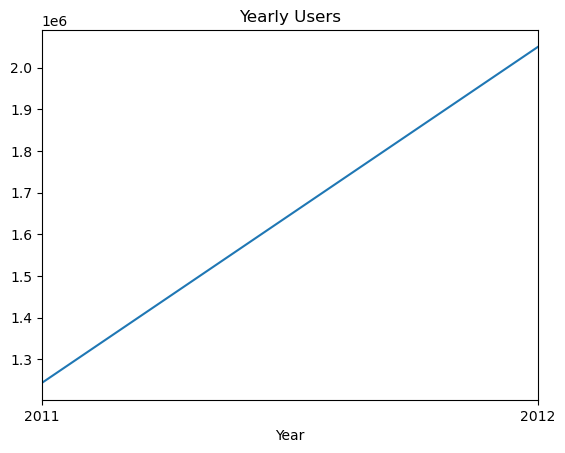

In [10]:
df.resample('Y')['cnt'].sum().plot(kind='line', title='Yearly Users')
plt.xlabel('Year')
plt.show()

The blue line represents the number of yearly users, showing a steady increase from 2011 to 2012. This suggests that the bike-sharing service has been growing in popularity. The line graph shows a significant increase in users in the year 2012 compared to 2011. This could be due to various factors such as increased awareness of the service, expansion of service areas, or improvements in service quality. From these insights, one could recommend that Leo Bike Share Co. continue their current strategies that have contributed to this growth. Additionally, they could conduct further analysis to understand which specific factors have led to this increase in users and focus on those areas for future growth.

Visual 7 - the number of people using the bikes during weekdays

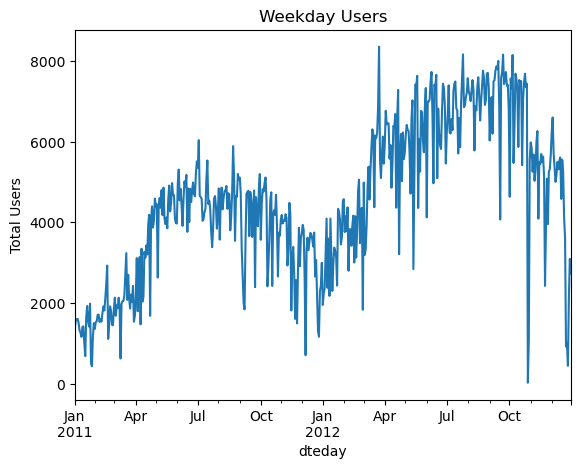

In [11]:
df[df['weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]['cnt'].plot(kind='line', title='Weekday Users')
plt.ylabel('Total Users')
plt.show()

The blue line represents the number of weekday users, showing a general increase from January 2011 to July 2012. This suggests that the bike-sharing service has been growing in popularity among weekday users. The line graph shows a peak in users around July 2012. This could be due to various factors such as favorable weather conditions during summer and fall, increased tourism, local events, or more commuting via bikes. After the peak in Oct 2012, there’s a sharp decline in the number of users. This could be most probably due to the end of the fall season or other factors that would need further investigation. From these insights, one could recommend that Leo Bike Share Co might focus on understanding the factors that contributed to the peak in July 2012 and try to replicate them in future strategies. The sharp decline after July 2012 should be investigated to understand its causes and address them. There are also two prominent peaks in user activity, one around July 2011 and another higher one near Oct 2012. These peaks could correspond to specific events or favorable conditions that led to an increase in bike rentals. After each peak, there is a noticeable decline in the median users per weekday. This could suggest a seasonal trend where certain times of the year are more popular for bike rentals, or it could be the result of a temporary boost in rentals due to specific events. The pattern of peaks and declines suggests there might be cyclic or seasonal trends in user activity. For example, more users might rent bikes during warmer months and fewer during colder months. This graph could be useful for understanding the behavior of users over time and identifying peak rental periods.

Visual 8 - the number of people using the bikes during holidays

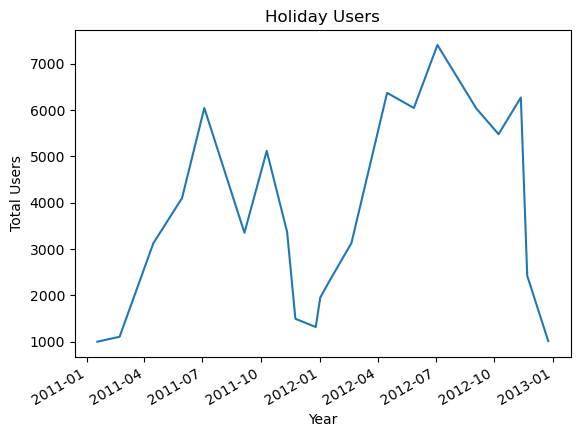

In [12]:
fig = df[df['holiday'] == 1]['cnt'].plot(kind='line', title='Holiday Users').get_figure()
plt.xlabel('Year')
plt.ylabel('Total Users')
plt.show()

The blue line represents the number of holiday users, showing a general increase from early 2011 to late 2012. This suggests that the bike-sharing service has been growing in popularity among holiday users. The line graph shows a peak in users around October 2012. This could be due to various factors such as favorable weather conditions during fall, increased tourism, or more commuting via bikes during the holiday season. After the peak in October 2012, there’s a sharp decline in the number of users. This could be due to the end of the holiday season which can be said the same for 2011 with its sharp decline, or other factors that would need further investigation such as local events being organised for the certain celebrations. From these insights, one could recommend that Leo Bike Share Co might focus on understanding the factors that contributed to the peak in October 2012 and try to replicate them in future strategies.

Visual 9 - the increase in registered users over the years compared to casual users

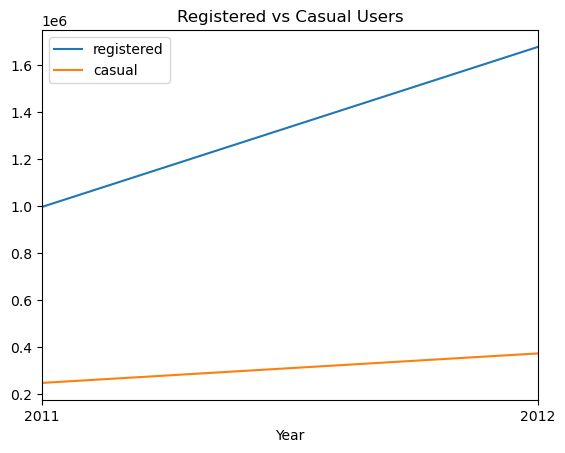

In [13]:
df.resample('Y')['registered', 'casual'].sum().plot(kind='line', title='Registered vs Casual Users')
plt.xlabel('Year')
plt.show()

The blue line represents the number of registered users, showing a steady increase from 2011 to 2012. This suggests that more and more users are registering for the bike-sharing service over time. The orange line represents the number of casual users, which remains relatively flat over the same period. This could indicate that while the service is gaining more registered users, the number of casual users isn’t growing at the same rate or it could mean over time there was a conversion of casual users to registered users while new casual users were acquired. From these insights, one could recommend that Leo Bike Share Co might focus on converting casual users to registered users or continue to do so if they have implemented such initiatives. They could do this by offering incentives for registration or improving the registration process to make it more user-friendly.

Visual 10 - the days with the lowest users

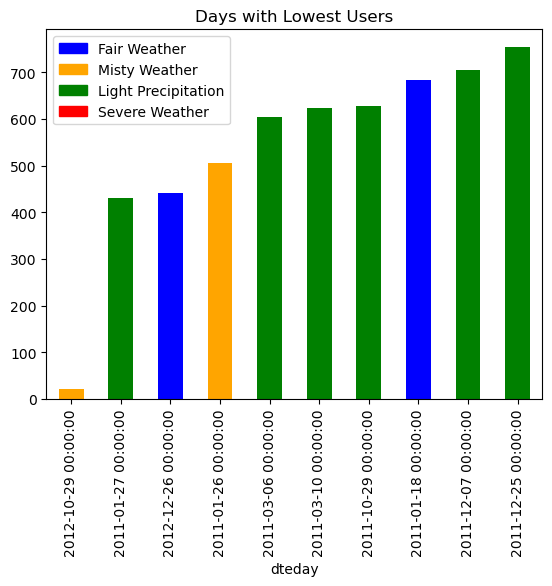

In [14]:
lowest_days = df.resample('D')['cnt'].sum().nsmallest(10)
weather_conditions = df.loc[df.index.isin(lowest_days.index)]['weathersit']
color_map = {'Fair Weather': 'blue', 'Misty Weather': 'orange', 'Light Precipitation': 'green', 'Severe Weather': 'red'} 
colors = weather_conditions.map(color_map)
fig = lowest_days.plot(kind='bar', color=colors, title='Days with Lowest Users').get_figure()
patches = [mpatches.Patch(color=color, label=label) for label, color in color_map.items()]
plt.legend(handles=patches)
plt.show()

The graph shows certain days with particularly low user counts. These could be due to various factors such as holidays, or other events. Identifying the specific reasons for these low usage days could help Leo Bike Share Co implement strategies to boost rentals on similar future days. Looking at the colours of each bar, the weather condition that has the lowest users is misty weather and the majority of the bars happened in light precipitaion. These rental numbers occurred in winter and spring months which shows the correlation between each other but for the day to have the lowest number of rentals to be in fall is astonishing for during that period rentals were at the peak. Based on these insights, the company could consider strategies like targeted marketing on traditionally low-rental days, partnerships with local businesses or events to increase visibility and attractiveness for potential renters on these particular days, and adjustments to the fleet based on these dates and the time period it is in. Looking into the specific conditions or events occurring on these low user count days to identify any commonalities or trends could allow the company to forecast where to allocate resources on the forecasted day . This could include analysing weather data, checking for any major events in the city, or looking at other potential factors that could impact bike rentals.

Visual 11 - the time when casual users contribute significantly to bike rentals

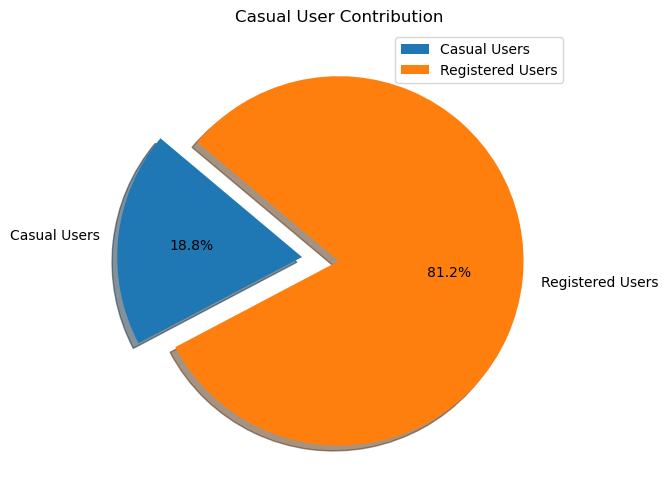

In [15]:
total_users = df[['casual', 'registered']].sum()
plt.figure(figsize=(6,6))
explode = (0.2, 0)
plt.pie(total_users, labels=['Casual Users', 'Registered Users'], autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)
plt.title('Casual User Contribution')
plt.legend()
plt.show()

The pie chart shows the composition of users, divided into casual and registered users. Registered users make up the majority of the user base, contributing to 81.2% of the total, while casual users contribute only 18.8%. The significant contribution from registered users could indicate a higher level of engagement or activity from these users. This might be due to increased features, permissions, or incentives available to registered users. The smaller contribution from casual users (18.8%) suggests there is potential for growth in this user segment. Strategies could be developed to convert casual users into registered users, thereby increasing their engagement and contribution.

The data suggests that the platform is successful in attracting and retaining registered users, as evidenced by their significant contribution (81.2%). Understanding the factors that drive this high level of engagement could help in replicating this success with casual users. The lower contribution from casual users (18.8%) could be due to various factors such as lack of awareness about the benefits of registration, perceived complexity of the registration process, or lack of incentives. Identifying and addressing these barriers could help in increasing the conversion rates from casual users to registered users. These insights could be useful for planning user engagement strategies, improving the registration process, and designing incentives for casual users.

Visual 12 - the distribution of users for each season

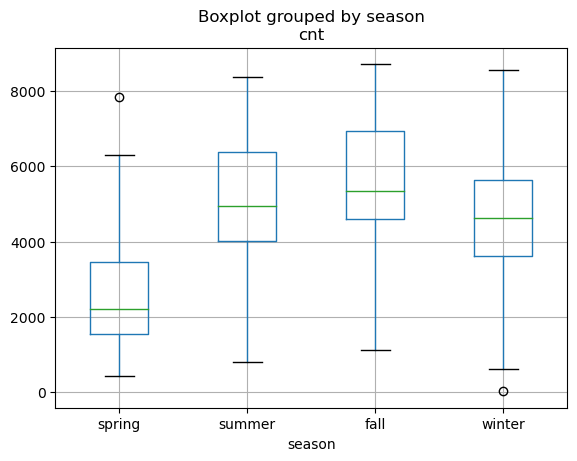

In [16]:
seasons_order = ['spring', 'summer', 'fall', 'winter']
df['season'] = df['season'].astype(CategoricalDtype(categories=seasons_order, ordered=True))
df.boxplot(column='cnt', by='season')
plt.show()

Fall tends to have the highest bike rentals, as indicated by the highest median value and data spread. This could be due to favorable weather conditions or popular outdoor activities during this season. Spring, on the other hand, has the lowest median value and data spread, suggesting that bike rentals decrease during this season. This could be due to varying weather conditions or fewer outdoor activities adding on to its already cold temperature. The outliers in the spring and winter seasons could represent unusual bike rental counts. These might be due to special events, holidays, or unseasonably severe weather. It would be beneficial to investigate these outliers further to understand their causes. The graph provides valuable insights into the distribution of bike rentals across different seasons. This can help in planning and forecasting bike rental demand. These insights can guide business improvements and marketing strategies for a bike-sharing service. For instance, promotional campaigns could be timed for spring to increase rentals, and special events could be planned around the outlier dates to capitalise on the high demand for those days that show high bike rental numbers.

Visual 13 - the correlation matrix to see how different variables are related to each other

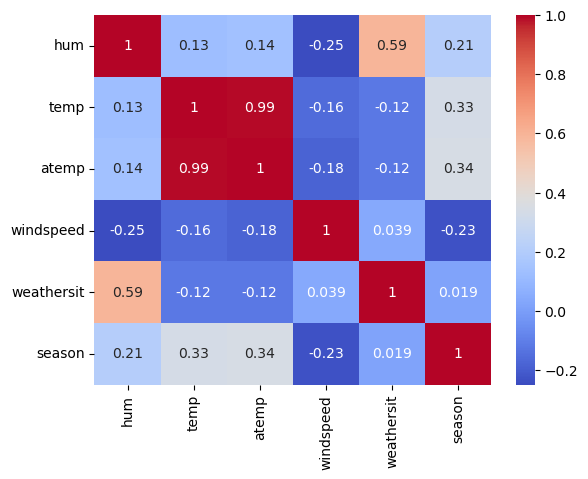

In [17]:
df_copy = df.copy()
weathersit_map = {'Fair Weather': 0, 'Misty Weather': 1, 'Light Precipitation': 2, 'Severe Weather': 3}
season_map = {'spring': 0, 'summer': 1, 'fall': 2, 'winter': 3}
df_copy['weathersit'] = df_copy['weathersit'].map(weathersit_map)
df_copy['season'] = df_copy['season'].map(season_map)
selected_columns = df_copy[['hum', 'temp', 'atemp', 'windspeed', 'weathersit', 'season']]
corr = selected_columns.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

The very strong positive correlation of 0.99 between temperature and apparent temperature indicates that these two variables increase and decrease together. The team could consider focusing on apparent temperature when analysing the impact of weather conditions on bike rentals or making predictive models and refer to the actual temperature. Weather situation has a moderate positive correlation of 0.59 with humidity. This suggests that certain weather situations might be associated with higher humidity levels. Understanding this relationship could help the team predict bike rental demand based on weather forecasts. Wind speed has a weak negative relationship with both humidity (-0.25) and apparent temperature (-0.18). This suggests that wind speed tends to be lower when humidity and apparent temperature are higher. If wind speed significantly affects bike rentals, this could be an important factor to consider in weather-based marketing strategies. Season has a weak negative correlation with weather situation (-0.23), indicating that certain seasons might be associated with certain weather situations. This could provide insights into seasonal trends in bike rentals. These insights can guide the market research team in understanding how different weather variables interact and their potential impact on bike rentals. By leveraging these insights, the team can provide meaningful recommendations to the management of Leo Bike Share Co for future business improvements. These could include strategies for weather-based marketing, resource allocation during different seasons, and user engagement initiatives during different weather situations.

Visual 14 - the number of users for each month to see which months have the highest and lowest usage

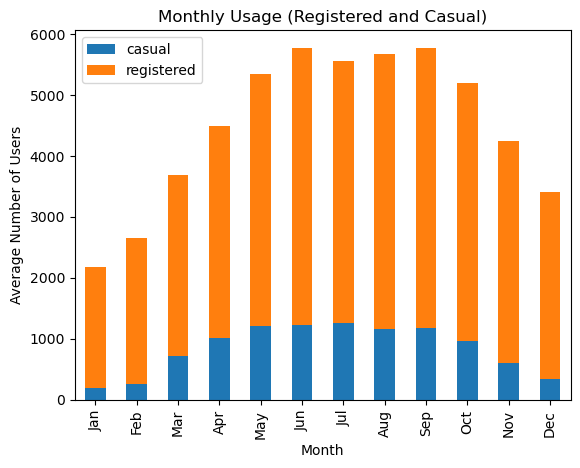

In [18]:
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['mnth'] = pd.Categorical(df['mnth'], categories=months_order, ordered=True)
grouped = df.groupby('mnth')[['casual', 'registered']].mean()
fig, ax = plt.subplots()
grouped.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Monthly Usage (Registered and Casual)')
ax.set_xlabel('Month')
ax.set_ylabel('Average Number of Users')
plt.show()

The bars representing June and September reach close to 6000 users, suggesting that these months have the highest bike rentals. This could be due to favorable weather conditions during these months, making outdoor activities like biking more enjoyable. During this period, the ratio of casual users to registered users increased compared to the other months which shows the contribution casual users have made. The bars for December, February, and January are significantly lower, with January just above 2000 users. This could indicate that fewer people rent bikes during these months. The reasons could be varied - perhaps the weather is more unpredictable, or there are fewer tourists around this time. From these insights, one could recommend that Leo Bike Share Co might focus on promoting bike rentals during April and October when demand is high and focus on the conversion of casual users to registered users through promotions. For December, February, and January, they could investigate why rentals are low and take appropriate measures to boost them.

Visual 15 - temperature throughout the year colourised by the seasons

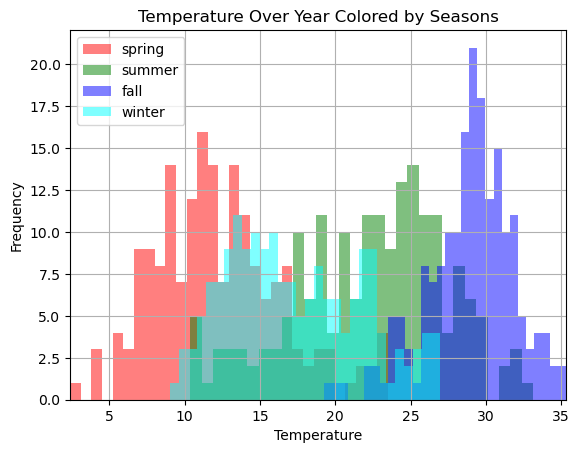

In [19]:
color_dict = {'spring': 'red', 'summer': 'green', 'fall': 'blue', 'winter': 'cyan'}
fig, ax = plt.subplots()

for season in df['season'].unique():
    df[df['season'] == season]['temp'].hist(ax=ax, bins=30, alpha=0.5, color=color_dict[season])

plt.title('Temperature Over Year Colored by Seasons')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(df['season'].unique())
plt.xlim([df['temp'].min(), df['temp'].max()])
plt.show()

The graph clearly shows the typical pattern of seasonal temperature variation. The temperature peaks during the summer and is at its lowest during the winter. The temperature in spring starts off cooler, warms up significantly before cooling down again, indicating the transition from winter to summer. There’s a sharp increase in temperature during summer, reaching peak temperatures before declining, which is expected due to the warmer climate. Fall begins warm but sees a rapid decrease in temperature, signaling the onset of winter. Winter remains consistently cold, with slight variations, which is typical for the season. This graph is a good representation of how temperature changes with the seasons, and it can be useful for understanding weather patterns or planning strategies based on expected temperatures to increase the user base of bike rentals and mitigating the decrease of loss when there are lower users. Additionally, we can now infer why spring has the lowest number of bike rentals due to its low temperature and therefore, Leo Bike Share Co make the appropriate arrangements to mitigate the decrease and encourage users to rent bikes.

Visual 16 - Rentals by Season and Weather Situation

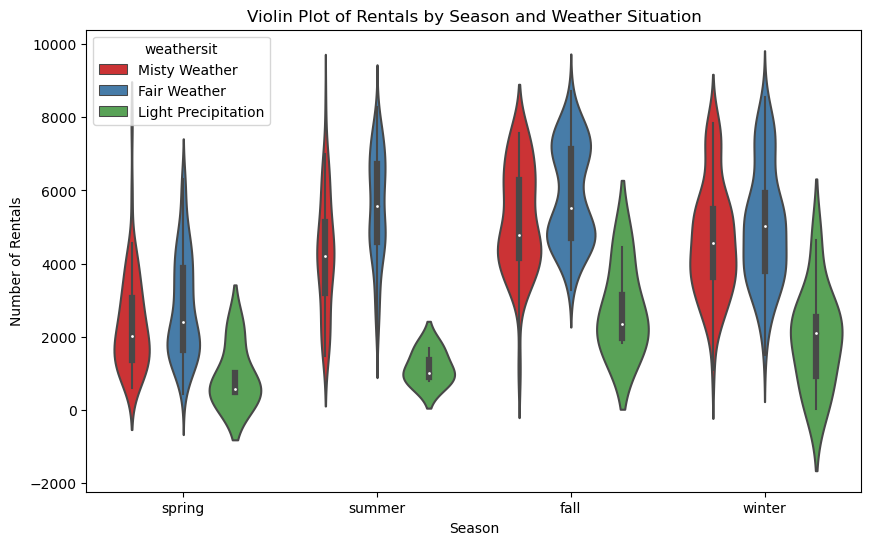

In [20]:
plt.figure(figsize=(10,6))
sns.violinplot(x='season', y='cnt', hue='weathersit', data=df, palette='Set1')
plt.title('Violin Plot of Rentals by Season and Weather Situation')
plt.xlabel('Season')
plt.ylabel('Number of Rentals')
plt.show()

The plot includes four different seasons: spring, summer, fall, and winter. This suggests that the bike rentals vary by season. Three different weather situations are represented: misty, fair, and light precipitation. Fair weather consistently has higher numbers of bike rentals across all seasons, with its peak in summer and fall. Misty weather also sees significant bike rental activity but less than fair weather conditions. Bike rentals drop dramatically during light precipitation across all seasons. This indicates that weather conditions significantly impact bike rentals. The distribution of rentals is widest during fair weather in the summer, indicating a broad range of rental numbers. This suggests that though summer is the second most popular season for bike rentals when the weather is fair. This means its numbers are not concentrated at a high number and Leo Bike Share Co might want to investigate why there is such unstable bike rental numbers. The y-axis represents the number of rentals, ranging from 0 to 10,000. This provides an idea of the scale of bike rentals. This plot could be useful for understanding how weather conditions and seasons affect bike rentals. Such understanding can help in planning and forecasting bike rental demand. These insights can guide business improvements and marketing strategies for a bike-sharing service such as promotional campaigns could be timed for warmer weather to attract more users, and weather forecasts could be used to anticipate and plan for potential decreases in rentals.

Visual 17 - Number of Rentals Against the Months

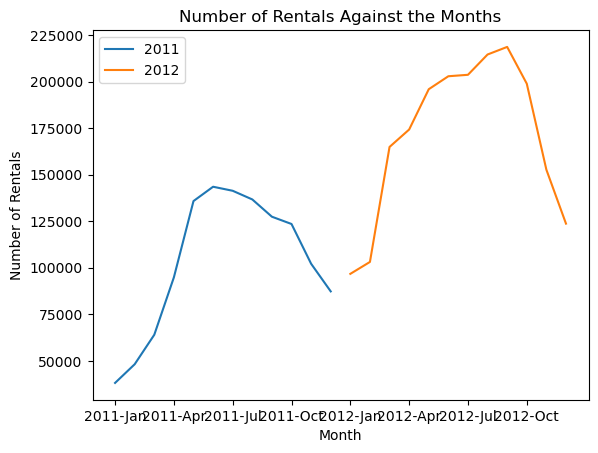

In [21]:
grouped = df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()
grouped['year-month'] = grouped['yr'].astype(str) + '-' + grouped['mnth'].astype(str)

for year in grouped['yr'].unique():
    data = grouped[grouped['yr'] == year]
    plt.plot(data['year-month'], data['cnt'], label=str(year))

plt.title('Number of Rentals Against the Months')
plt.xlabel('Month')
plt.ylabel('Number of Rentals')
plt.xticks(range(0, len(grouped['year-month']), 3), grouped['year-month'][::3])
plt.legend()
plt.show()

The graph shows a clear seasonal trend in bike rentals for both years. The number of rentals increases from the start of the year, peaks around July, and then decreases towards the end of the year. This could be due to various factors such as weather conditions, tourist influx, or city-wide events that encourage outdoor activities. Moreover, the graph shows a higher number of rentals in 2012 compared to 2011 for almost every month. This indicates a positive growth in the usage of the bike-sharing service from one year to the next. July appears to be the peak month for bike rentals in both years. This could suggest that the summer months are the most popular time for bike rentals, possibly due to favorable weather conditions and longer daylight hours. Based on these insights, Leo Bike Share Co should plan marketing and promotional activities around the peak usage times which is around July to maximize user acquisition and engagement. The company should ensure that adequate resources and manpower during the peak months to handle the increased demand. Implementing strategies to retain users during the off-peak months by offering incentives or organizing events is a good way to encourage bike rentals even during colder months.

# Dashboards <a id = "dashboards"></a>

Dashboard 1 - Company's Growth and Acquisition of Users

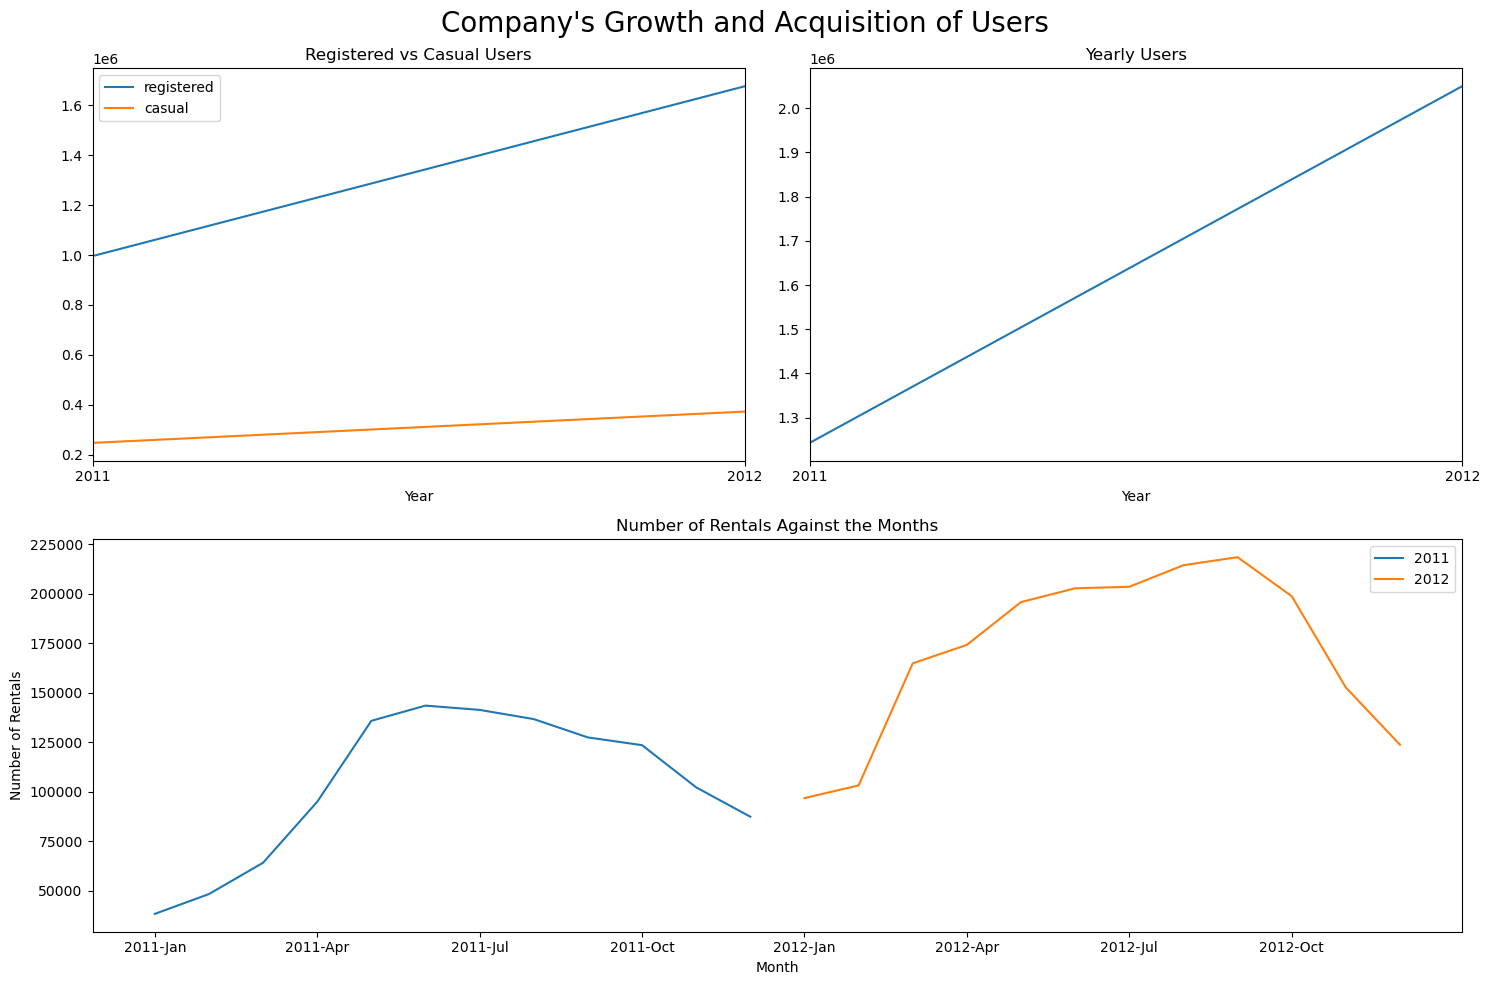

In [22]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

df.resample('Y')['registered', 'casual'].sum().plot(kind='line', title='Registered vs Casual Users', ax=ax1)
ax1.set_xlabel('Year')

df.resample('Y')['cnt'].sum().plot(kind='line', title='Yearly Users', ax=ax2)
ax2.set_xlabel('Year')

grouped = df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()
grouped['year-month'] = grouped['yr'].astype(str) + '-' + grouped['mnth'].astype(str)
for year in grouped['yr'].unique():
    data = grouped[grouped['yr'] == year]
    ax3.plot(data['year-month'], data['cnt'], label=str(year))

ax3.set_title('Number of Rentals Against the Months')
ax3.set_xlabel('Month')
ax3.set_ylabel('Number of Rentals')
ax3.set_xticks(range(0, len(grouped['year-month']), 3))
ax3.set_xticklabels(grouped['year-month'][::3])
ax3.legend()
fig.suptitle("Company's Growth and Acquisition of Users", fontsize=20)
plt.tight_layout()
plt.show()

The steady increase in both registered and casual users over the years is a positive sign of growth for Leo Bike Share Co. This suggests that the company’s services are well-received and there’s a growing demand for bike-sharing services in Washington DC. The company should continue to invest in marketing and customer acquisition strategies to sustain this growth. Additionally, understanding the factors driving this growth could help in replicating this success in other markets. The bottom visual also reaffirms the fact that the company's customer base is growing with the number of rentals throughout the year showing an increasing trend where it peaks around July. Therefore, the company can then leverage this influx of rentals by conducting promotions for casual or new users to become registered users and other special promotions. Moreover, the significant difference between registered and casual users suggests that most users prefer to register rather than use the platform casually. This could indicate a high level of user commitment and satisfaction. This presents an opportunity to convert more casual users into registered ones. Strategies could include offering incentives for registration, or tailoring marketing campaigns to highlight the benefits of being a registered user. The data so far suggests that weather conditions significantly influence bike rentals. This insight could be used to remind the company that what they have been doing is effective and to scale it solutions like offer weather-based promotions or discounts to encourage rentals during less favorable weather conditions. In conclusion, these insights provide a valuable understanding of the company's growth over time. By leveraging these insights, Leo Bike Share Co can make informed decisions to enhance user engagement, improve customer satisfaction, and drive business growth. Additionally, Leo Bike Share Co might have to source for other methods to scale the company as what is working for Washington DC may not work for other states or multiple states at an instance.

Dashboard 2 - How Weather Conditions Affect Users

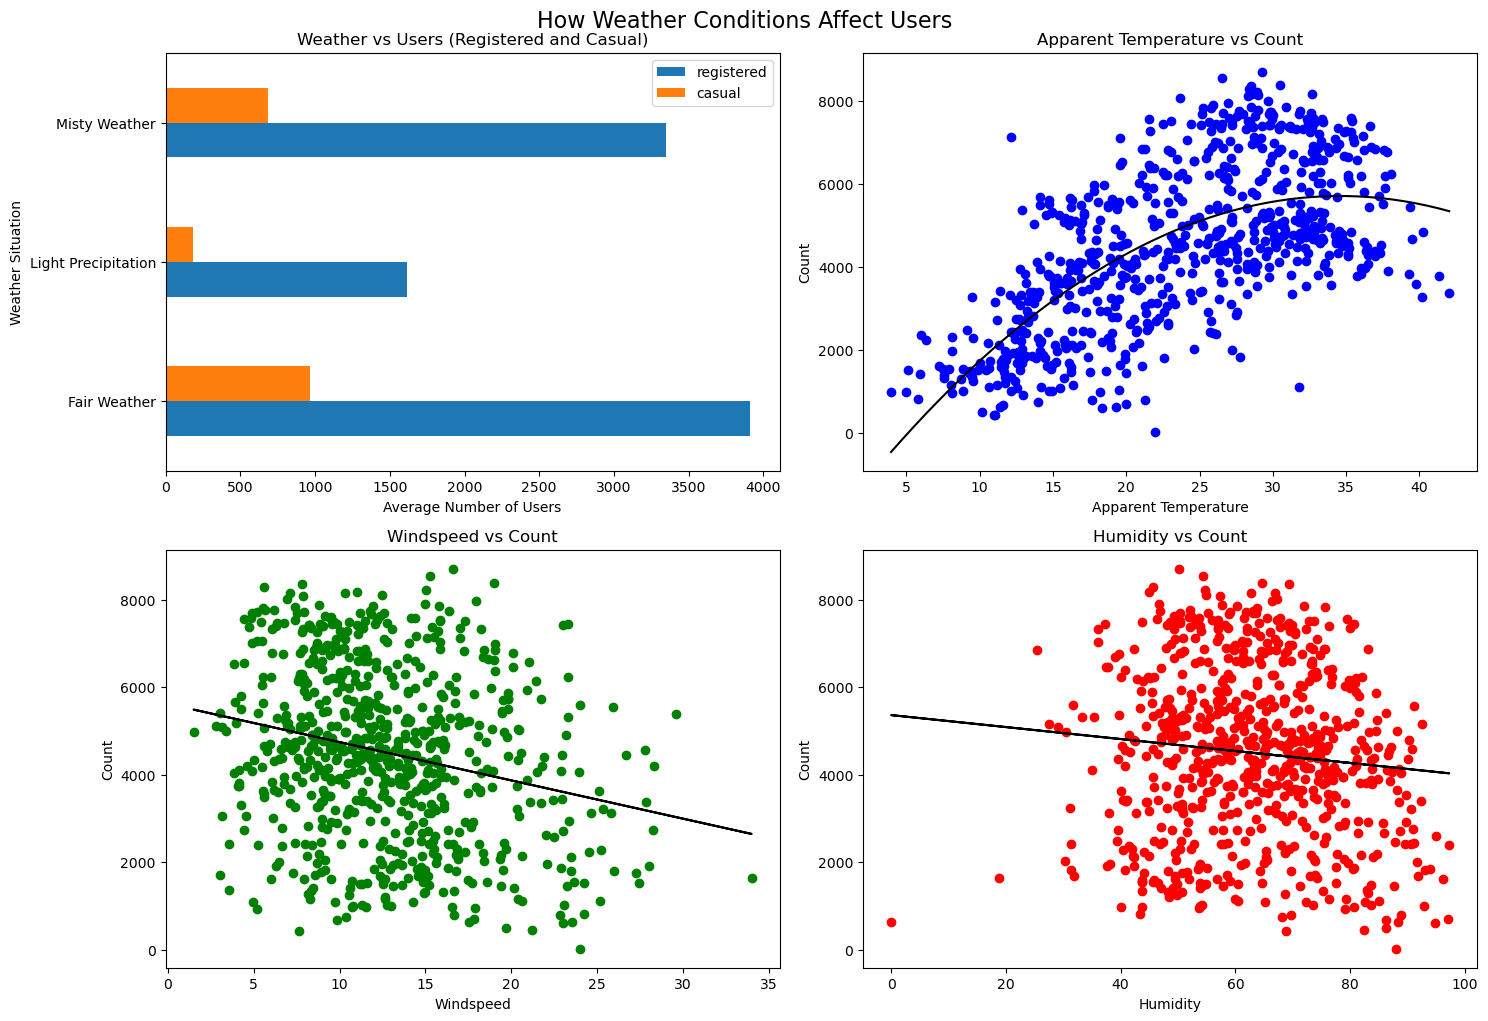

In [23]:
gs = gridspec.GridSpec(3, 2)
fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

grouped = df.groupby('weathersit')[['registered', 'casual']].mean()
grouped.plot(kind='barh', stacked=False, ax=ax1)
ax1.set_title('Weather vs Users (Registered and Casual)')
ax1.set_xlabel('Average Number of Users')
ax1.set_ylabel('Weather Situation')

coefficients = np.polyfit(df['atemp'], df['cnt'], 2)
polynomial = np.poly1d(coefficients)
x_values = np.linspace(df['atemp'].min(), df['atemp'].max())
y_values = polynomial(x_values)
ax2.scatter(df['atemp'], df['cnt'], color='b')
m, b = np.polyfit(df['atemp'], df['cnt'], 1)
ax2.plot(x_values, y_values, color='black')
ax2.set_xlabel('Apparent Temperature')
ax2.set_ylabel('Count')
ax2.set_title('Apparent Temperature vs Count')

ax3.scatter(df['windspeed'], df['cnt'], color='g')
m, b = np.polyfit(df['windspeed'], df['cnt'], 1)
ax3.plot(df['windspeed'], m*df['windspeed'] + b, color='black')
ax3.set_xlabel('Windspeed')
ax3.set_ylabel('Count')
ax3.set_title('Windspeed vs Count')

ax4.scatter(df['hum'], df['cnt'], color='r')
m, b = np.polyfit(df['hum'], df['cnt'], 1)
ax4.plot(df['hum'], m*df['hum'] + b, color='black')
ax4.set_xlabel('Humidity')
ax4.set_ylabel('Count')
ax4.set_title('Humidity vs Count')
fig.suptitle("How Weather Conditions Affect Users", fontsize=16)
plt.tight_layout()
plt.show()

The data suggests that weather conditions significantly influence bike rentals. Fair weather and comfortable temperatures seem to attract more users. This could be because biking is an outdoor activity, and people are more likely to engage in it when the weather is pleasant and the temperature is comfortable. Leo Bike Share Co could use this insight to adjust their marketing and operations strategies according to the weather. For instance, they could offer special promotions during fair weather to attract more users. They could also ensure that there are enough bikes available during these times to meet the increased demand. Furthermore, the four visuals come together to show the optimal condition where the users are most likely to rent and cycle in. This allows the company to leverage such information to make decisions to advertise this to users and encourage them to rent them, thereby increasing the generation of revenue. This would also allow for the company to avoid allocating too much resources on days where it would seem a less than ideal condition to cycle in, optimizing resource management. The fact that registered users rent bikes more frequently than casual users in all weather situations could indicate a high level of user commitment and satisfaction. This suggests that once users register, they are likely to use the service regularly regardless of the weather. This is a positive sign for Leo Bike Share Co as it indicates strong user loyalty. The company could focus on converting more casual users into registered users by highlighting the benefits of registration, such as access to special deals or faster booking process. In conclusion, these insights provide a valuable understanding of how weather conditions and user types influence bike rentals. By leveraging these insights, Leo Bike Share Co can make informed decisions to enhance user engagement, improve customer satisfaction, and drive business growth. 

Dashboard 3 - How Seasonal Conditions Affect The Users

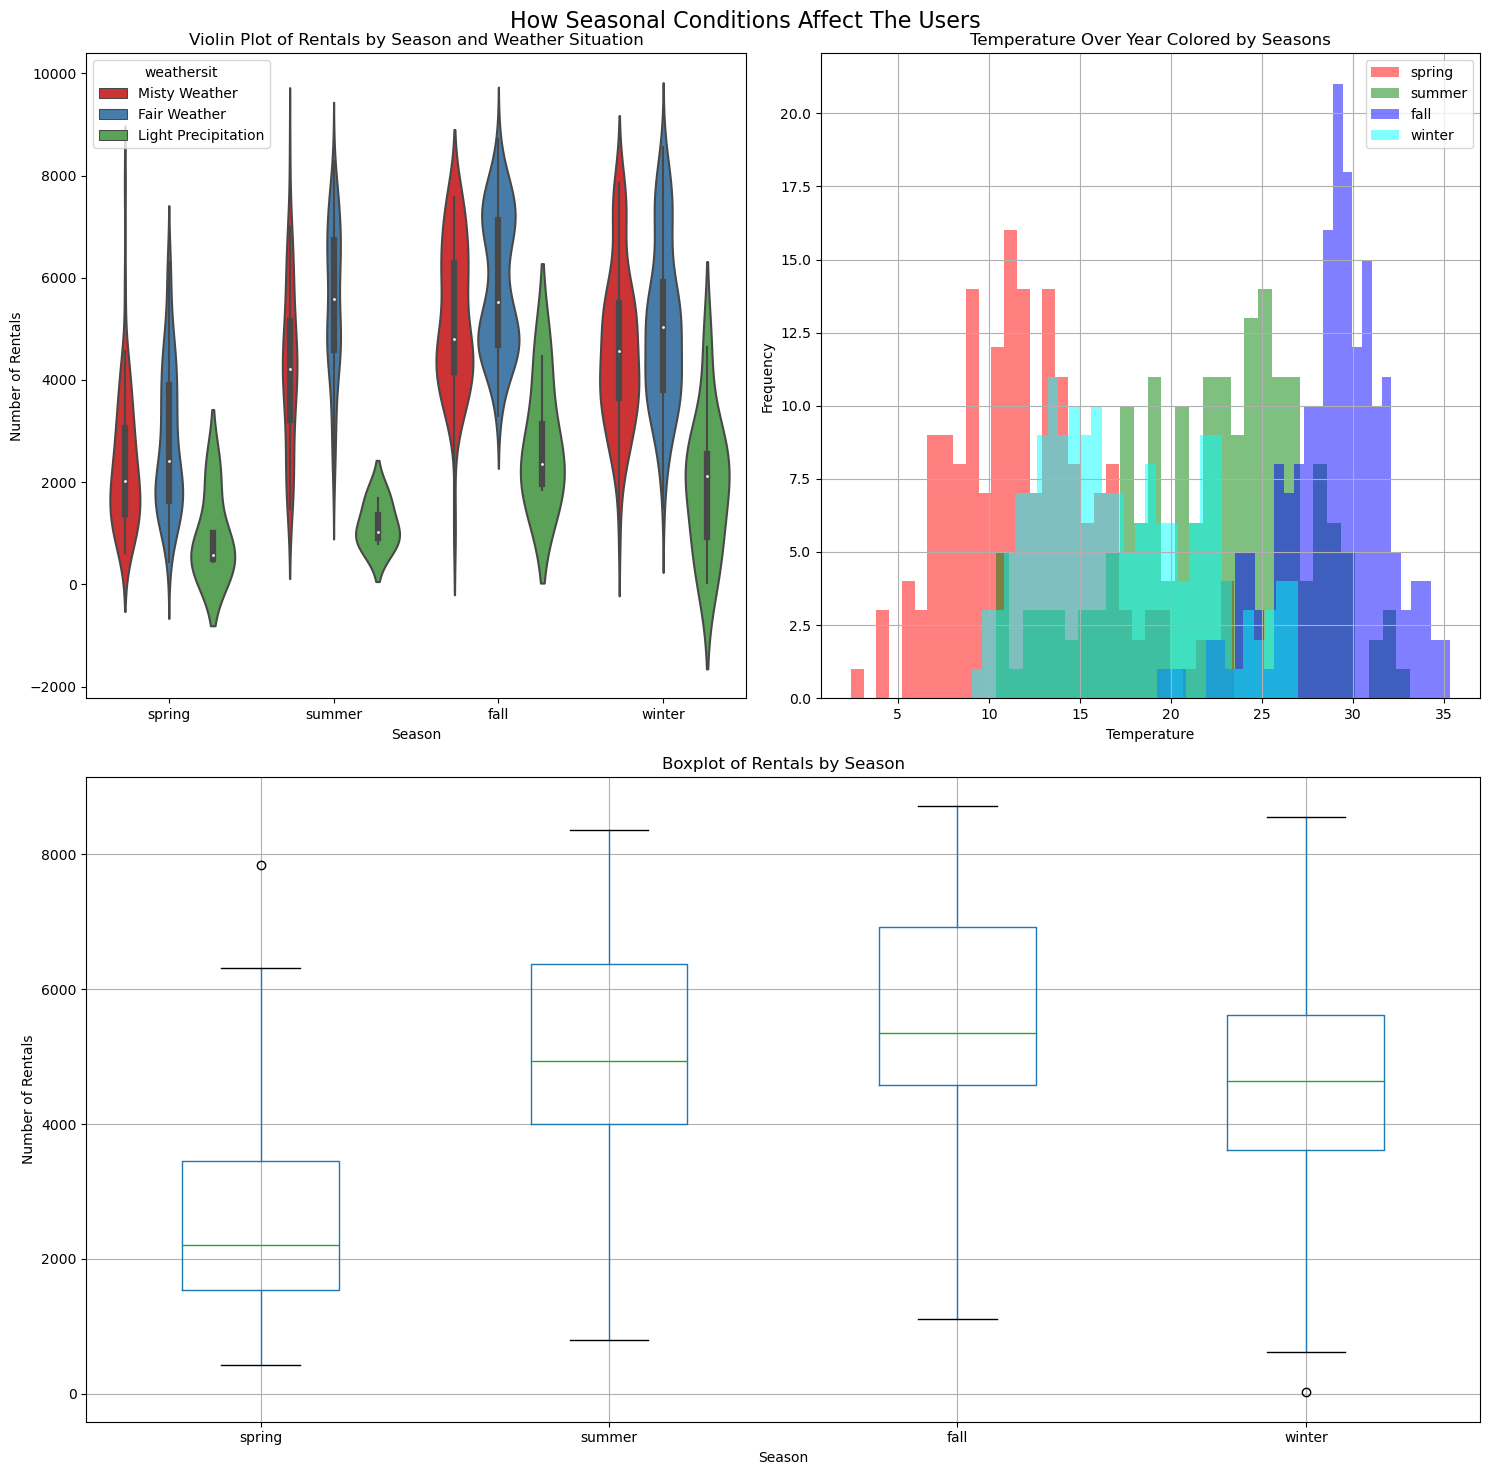

In [24]:
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

sns.violinplot(x='season', y='cnt', hue='weathersit', data=df, palette='Set1', ax=ax1)
ax1.set_title('Violin Plot of Rentals by Season and Weather Situation')
ax1.set_xlabel('Season')
ax1.set_ylabel('Number of Rentals')

for season in df['season'].unique():
    df[df['season'] == season]['temp'].hist(ax=ax2, bins=30, alpha=0.5, color=color_dict[season])
    
ax2.set_title('Temperature Over Year Colored by Seasons')
ax2.set_xlabel('Temperature')
ax2.set_ylabel('Frequency')
ax2.legend(df['season'].unique())

df.boxplot(column='cnt', by='season', ax=ax3)
ax3.set_title('Boxplot of Rentals by Season')
ax3.set_xlabel('Season')
ax3.set_ylabel('Number of Rentals')
fig.suptitle("How Seasonal Conditions Affect The Users", fontsize=16)
plt.tight_layout()
plt.show()

The data suggests that weather and season significantly influence bike rentals. The season of fall, clear weather and warmer temperatures has the highest likelihood of bike rentals. This could be because clear weather conditions are more conducive to outdoor activities like biking. Leo Bike Share Co could use this insight to adjust their marketing and operations strategies according to the optimal weather and season. For instance, they could offer special promotions during clear weather and warmer temperatures to attract more users. They could also ensure that there are enough bikes available during fall times to meet the increased demand. The histogram shows that the majority of rentals occur at comfortable temperatures which are at a range from 20 to 30 degrees Celsius. This suggests that temperature plays a crucial role in people’s decision to rent bikes. This insight could be used to ime user eprovxperience. For example, Leo Bike Share Co could provide tips on safe biking in different temperatures, or they could use a thickened design for their bike seats where they have been used in some bike cushion covers. This design provides heat insulation and is also sun resistant. It is made of a high-quality net material, which is durable and wear-resistant. The honeycomb design makes it anti-slip and breathable. Having a cutout in the center of the seat would also offer the users comfort, shock absorption and pressure relief. The boxplot indicates that fall is the most popular season for bike rentals, possibly due to the favorable weather conditions. However, there is also a wide spread of data in summer, suggesting varying rental patterns within the season. This insight could be used to better plan inventory during the summer months. Understanding the rental patterns within the season could help in better resource allocation - ensuring adequate availability of bikes to meet demand and improve customer satisfaction. They might want to stock up on bikes and run promotions during the summer to attract more customers. In conclusion, these insights provide a valuable understanding of how weather conditions and seasons influence bike rentals and there is connection with "How Weather Conditions Affect Users" Dashboard and can be used cocurrently to further analyse trends. By leveraging these insights, Leo Bike Share Co can make informed decisions to enhance user engagement, improve customer satisfaction, and drive business growth.

Dashboard 4 - User Behaviour

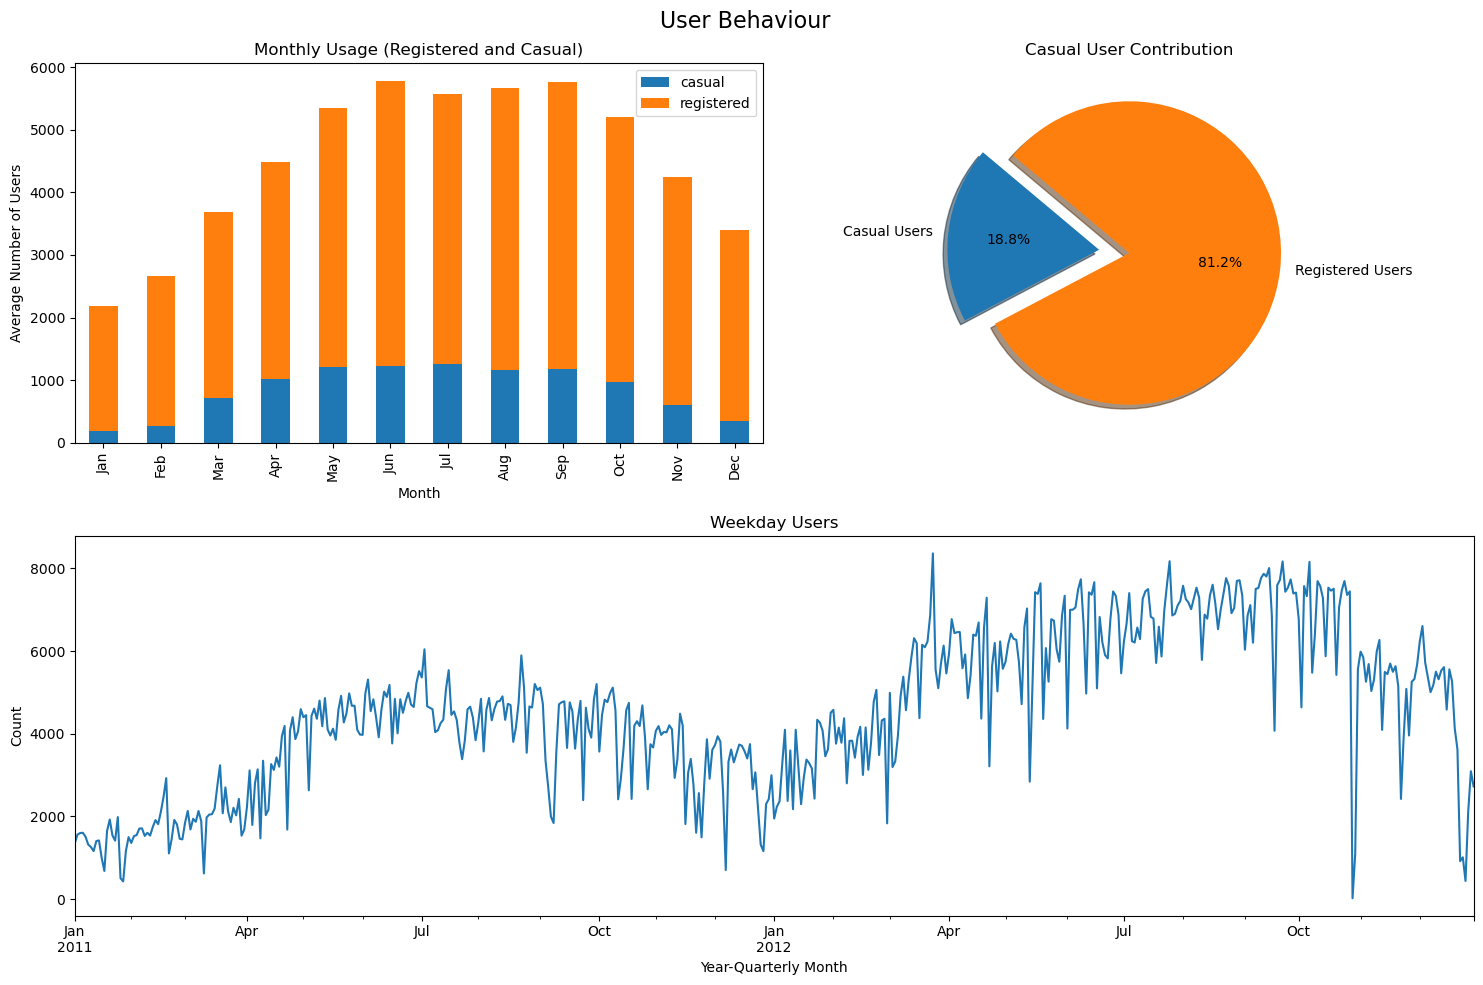

In [25]:
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['mnth'] = pd.Categorical(df['mnth'], categories=months_order, ordered=True)
grouped = df.groupby('mnth')[['casual', 'registered']].mean()
grouped.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Monthly Usage (Registered and Casual)')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Number of Users')

total_users = df[['casual', 'registered']].sum()
explode = (0.2, 0)
ax2.pie(total_users, labels=['Casual Users', 'Registered Users'], autopct='%1.1f%%', startangle=140, 
        explode = explode, shadow = True)
ax2.set_title('Casual User Contribution')

df[df['weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]['cnt'].plot(kind='line', title='Weekday Users', ax=ax3)
ax3.set_xlabel('Year-Quarterly Month')
ax3.set_ylabel('Count')
fig.suptitle("User Behaviour", fontsize=16)
plt.tight_layout()
plt.show()

The data suggests that registered users make up the majority of the user base, contributing to over 80% of the total usage. This could indicate a high level of user commitment and satisfaction. This is a positive sign for Leo Bike Share Co as it indicates strong user loyalty. The company could focus on converting more casual users into registered users by highlighting the benefits of registration, such as access to special deals or faster booking process. The significant drop in users from October to January could be due to seasonal factors, such as colder weather or holidays. The slight increase in February suggests that the usage begins to recover after the drop. Understanding these seasonal trends can help Leo Bike Share Co plan its inventory and marketing strategies. For instance, they might want to stock up on bikes before the start of February to meet the recovering demand. The seasonality observed in the “Weekday Users” visual could be due to various factors, such as weather changes, holidays, or school schedules. The distinct decline in late Oct was due to Hurricane Sandy in 22 Oct 2012 which coincide with the all-time low bike rental number. The company can take note of this and take such incidents where it was inevitable into consideration when analysing the data. The peaks around mid-year suggest that the usage is highest during the summer months, which could be due to warmer weather and longer daylight hours. Identifying these peak usage times can help in better resource allocation - ensuring adequate availability of bikes on these days to meet demand and improve customer satisfaction. These insights could be useful for planning marketing strategies, resource allocation, and user engagement initiatives. For example, special promotions or programs could be launched during the summer months to further increase usage and obtain higher rental numbers. Additionally, strategies could be developed to encourage more casual users to register, thereby increasing their usage and contribution to the total user base. This could involve offering incentives for registration, or tailoring marketing campaigns to highlight the benefits of being a registered user. In conclusion, these insights provide a valuable understanding of user behavior and preferences at a macro level and a micro level. They highlight the importance of factors such as weather conditions or incidents and how it influences bike rentals immediately or in short term periods. By leveraging these insights, Leo Bike Share Co can make informed decisions to enhance user engagement, improve customer satisfaction, and drive business growth.

# Recommendations and Conclusion <a id = "recommendations-conclusion"></a>

After looking at all the insights and the statistics provided from the visuals, I can conclude that Bike rentals show a clear seasonal trend. Fall has the highest bike rentals, while spring has the lowest. This suggests that seasons plays a significant role in bike rental patterns. There is also a strong positive correlation between actual temperature and apparent temperature, and between temperature and casual bike rentals. This indicates that warmer temperatures lead to an increase in bike rentals, especially among casual users. However, there is a negative correlation between humidity and casual bike rentals, suggesting that higher humidity levels, which can make the weather feel hotter and more uncomfortable, lead to fewer casual bike rentals. The contribution of casual users fluctuates over time without a specific trend, indicating that casual user behavior might be influenced by various factors not represented in the graphs and data provided.

One of my recommendations for Leo Bike Share Co is to implement targeted marketing strategies based on the identified trends. For example, offer promotions during spring to boost rentals, and consider special campaigns for casual users when the weather forecast predicts comfortable temperatures. Leo Bike Share Co should plan its inventory and marketing strategies considering seasonal factors. They should anticipate a drop in users during colder weather or holidays, especially from December to January. Peak usage times during the fall months suggest the need for increased bike availability and promotional activities during this period. Leo Bike Share Co should implement engagement initiatives during peak usage times to further increase usage and user satisfaction. They should anticipate a drop in users during colder weather or holidays, especially from December to January. Peak usage times during the fall months suggest the need for increased bike availability and promotional activities during this period. Offering special promotions during clear weather and warmer temperatures to attract more users can prove to be fruitful as well due to the peak usage during those conditions.

More importantly, Leo Bike Share Co can highlight the benefits of registration, such as access to special deals, faster booking processes, and loyalty rewards thereby increasing the number of registered users. Manipulation of prices while emphasising that the value margin of the two experience is greater than the margin of the two prices, prompting new or casual users to opt to register. Strategies should also be developed to encourage more casual users to register, thereby increasing their usage and contribution to the total user base.

Leo Bike Share Co may also consider investing resources to research and manufacture weather-protected bikes to allow for users to feel safe and secure on the bike that they are riding on. Such features of the weather-protected bike can include anti-slip tyres, a thickened design for bike seats to resist the heat rays in the day which is made out of a high quality net material to provide wear and tear resistance and has a honeycomb design which makes it anti-slip and breathable. Having a cutout in the center of the seat would also offer the users comfort, shock absorption and pressure relief. The company can also provide tips on safe biking in different temperatures or discounts on predicted low-rental days due to less-than-ideal weather conditions. This could encourage users to rent bikes even in less-than-ideal weather.

Conducting further analysis to understand the factors influencing casual user behavior could reveal additional opportunities for boosting rentals among this user group. While windspeed has a slight negative correlation with bike rentals, Leo Bike Share Co can provide advice on safe biking in high winds or offer special equipment to help bikers deal with windy conditions. Leo Bike Share Co should continue investing in marketing and customer acquisition strategies to sustain the steady increase in registered and casual users over the years. They should also focus on providing excellent customer service and maintaining bike availability to meet growing demand. 

Exploring partnerships with weather forecasting platforms to provide users with timely updates and suggestions for bike rentals based on weather conditions is also another great way to boost their edge in the market of bike rentals. This proactive approach can help Leo Bike Share Co stay ahead of the competition and improve user satisfaction. 

Leo Bike Share Co could also possibly set up another branch office in either Oregon or Idaho, or both to increase customer base size allowing for the acquisition of new customers, thereby increasing the generation of revenue. This is due to them being adjacent to Washington DC where Leo Bike Share Co presence would be quite strong. Another option would be to analyze in which state there is a prevalent cycling culture and citizens would appreciate the option to ride a bicycle to travel like California, Colorado or Massachusetts.

Leo Bike Share Co thus far has been growing steadily and should continue to use the current strategies and systems they have in place. However, there is also a need for the investment of resources to mature these strategies and systems or even reestablish new strategies and systems for a larger scale such as a country wide scale or multiple state scale. For scaling from a small medium enterprise to a large enterprise is different from scaling a startup to a small medium enterprise, therefore appropriate measures and preparation must be taken so as to allow Leo Bike Share Co to be able to confront this issue when they reach a plateau in the growth of their business.

Additionally, Leo Bike Share Co can leverage AI and big data technologies such as Geographical Intelligence Systems (GIS) to identify spots with the highest demand and match the supply of bikes with demand. Providing bikes only where they are needed reduces their overall number, and means sidewalks are no longer cluttered with discarded ones. The tailored approach also makes it easier for people to find available bikes during rush hour. This could improve user experience and optimize resource allocation. Adjusting the fleet size of bicycles based on seasonal trends and weather forecasts to ensure availability of bikes is also another good strategy to optimise the resources of the company. 

The company could also consider exploring opportunities to integrate your services with public transport. This could increase the visibility and accessibility of your services. This also allows users who were previously limited on how fast they cycle to and fro from work, school or homes to now being able to cover larger distances in Washington DC state. Leo Bike Share Co could do this by possibly making the bicycles foldable and allowing users to board the bus or subway so as to commute larger distances.

Finally, invest in initiatives that promote cycling culture. This could increase the overall demand for bike-sharing services and grow the biking presence in the state and therefore, people might opt for renting a bike instead of buying one for themselves. It could also increase the possible customer base in Washington DC state for more people would be more inclined to have ridden bikes before and match the target audience of Leo Bike Share Co.

# Reflection <a id = "reflection"></a>

Generative AI Tools

Using ChatGPT or Bing AI, it shows that Mode Analytics is indeed the top business intelligence platform or that it is one of the top performing business in the competitive market.

Non-Generative AI Tools

Using Google to research, it did not show that Mode Analytic is as good as what is being said by ChatGPT or Bing AI. From what I have researched, it shows that Mode Analytics is not an industry leader at all like what the AI tools have mentioned.

Reliability and Accuracy

Generative AI tools like ChatGPT can sometimes provide inaccurate information due to several reasons such as the AI is trained on a large dataset from the internet, which may contain both accurate and inaccurate information. Interpretation of the query by the AI might misunderstand the user’s query, leading to irrelevant or incorrect responses. Lack of real-time data is also another reason why for the AI’s knowledge is based on the data it was trained on and does not include real-time updates or events happening after the training data was collected. Users can critically assess and verify the information provided by these tools by cross-verifying the information with multiple reliable sources, checking the date of the information, as some data might be outdated or use critical thinking and judgment to assess the plausibility and relevance of the information.

Understanding and Mitigating Flaws

Some strategies to mitigate the risks associated with relying on AI-generated content are to have awareness and critical thinking, cross-verification, and feedback and updates. Users should be aware of generative AI's limitations and not take the generated content at face value. Cross-verifying AI-generated content with other reliable sources can help ensure accuracy. When asked, providing feedback on incorrect outputs can help improve the AI model so that the developers and specialists know what to focus on for regular updates and re-training of the model can also help it stay current and reduce inaccuracies. Therefore, while AI can provide valuable insights and information, it’s always important to use critical thinking and verify the information from multiple sources.

# References <a id = "references"></a>

Connor, D. D. J. H. T. L. a. G. (n.d.). 1.6 GEOGRAPHIC DATA COLLECTION AND ANALYSIS – Introduction to human Geography. https://opentext.wsu.edu/introtohumangeography/chapter/1-6-geographic-data-collection-and-analysis/

Lanquist, L. (2023, July 31). We found the best bike seats for any cycling style after over 72 hours of riding. Verywell Fit. https://www.verywellfit.com/best-bike-seat-6259799

Meehan, C. (2023, December 13). These bike seat covers will add new life to your ride. Bicycling. https://www.bicycling.com/bikes-gear/g40709971/best-bike-seat-covers/